### This code illustrates how to determine the diffusion coefficient from the MSD data we calculated in the previous code example

### Prerequisite:
* MSD_calculation.ipynb

### Package Required:
* numpy
* matplotlib
* scipy

#### Note: If you don't have the packages listed above installed, then you can type in the following commands in the terminal
* conda install numpy
* conda install matplotlib
* conda install scipy

### File Required:
* BMIM_PF6_CO2_system_eq_step4_msd.txt (From the MSD_calculation code example)
If you don't have that done, there is one ready to test under ~/pikachu/homes/zhuo/haverford/code_example/



### Background:

* Diffusion coefficient.

Diffusion coefficient describes the mobility of the particle inside a system and it can be calculated using the following equation:

### MSD($\tau$) = 6D$\tau$ or 
### D = $\frac{MSD(\tau)}{6\tau}$

where D is diffusion coefficient, MSD is the mean square displacement, and $\tau$ is the time separation. 

* Linear regression

Linear regression is a common technique to correlate two variables together via linear relationship or a straight line. To learn more about linear regression, you can check out this resource https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Chemometrics_Using_R_(Harvey)/08%3A_Modeling_Data/8.01%3A_Linear_Regression_of_a_Straight-Line_Calibration_Curve

### The Actual Code:

1. Import packages:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

2. Load the data:

In [21]:
data = np.genfromtxt('BMIM_PF6_CO2_system_eq_step4_msd.txt', skip_header = 1, delimiter = ',')


In [22]:
taus = data[:,0]
taus

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 9.997e+01, 9.998e+01,
       9.999e+01])

In [23]:
msds = data[:,1]
msds

array([0.      , 0.044566, 0.057399, ..., 2.361982, 2.500855, 2.48033 ])

3. Make a scatter plot of MSD($\tau$) vs $\tau$

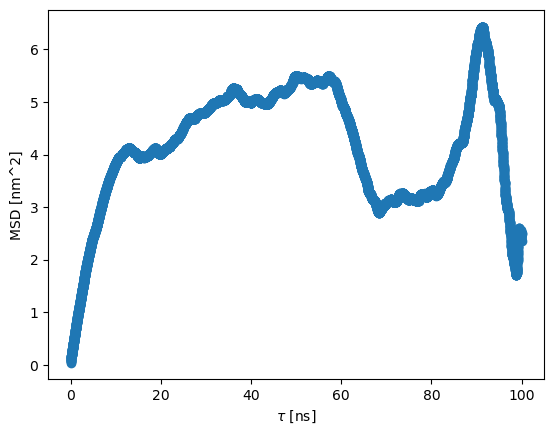

In [24]:
plt.scatter(taus[1:int(len(taus))], msds[1:int(len(msds))], picker=True)
plt.xlabel('$\\tau$ [ns]')
plt.ylabel('MSD [nm^2]')
plt.show()

This looks pretty bad.

Let's zoom in the region where $\tau$ is small. This means that we have more data points to analyze. You may refer back to the example in the MSD_calculation example to see why this is the case.  

4. Zoom in

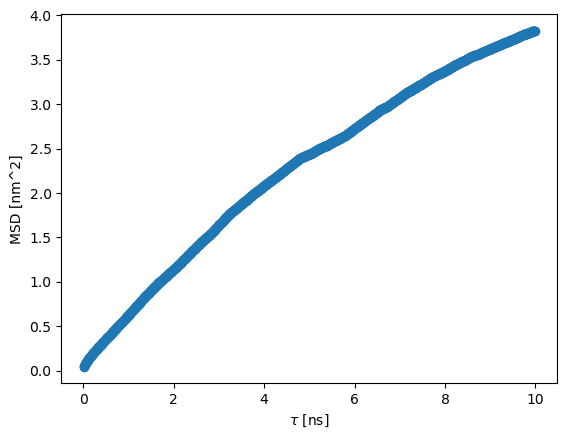

In [25]:
plt.scatter(taus[1:int(len(taus)/10)], msds[1:int(len(msds)/10)], picker=True)
plt.xlabel('$\\tau$ [ns]')
plt.ylabel('MSD [nm^2]')
plt.show()

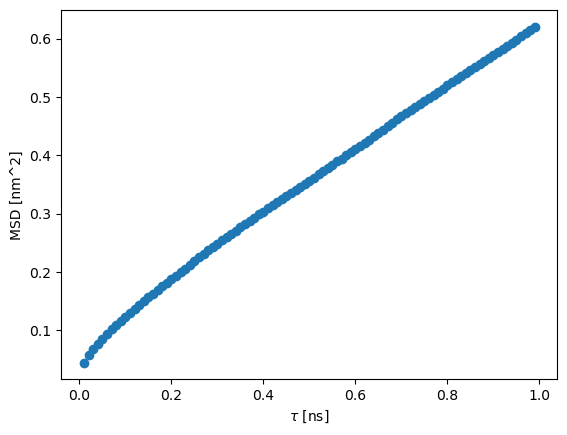

In [26]:
plt.scatter(taus[1:int(len(taus)/100)], msds[1:int(len(msds)/100)], picker=True)
plt.xlabel('$\\tau$ [ns]')
plt.ylabel('MSD [nm^2]')
plt.show()

5. Pick a region to perform linear fitting. Here, I choose $\tau$ from 0.2 to 0.6

In [27]:
start_pt = np.where(taus == 0.2)

In [28]:
end_pt = np.where(taus == 0.6)
end_pt

(array([60]),)

In [29]:
taus_selected = taus[int(start_pt[0]):int(end_pt[0])]
taus_selected

/tmp/ipykernel_69823/3667065676.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  taus_selected = taus[int(start_pt[0]):int(end_pt[0])]


array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52,
       0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59])

In [30]:
msds_selected = msds[int(start_pt[0]):int(end_pt[0])]
msds_selected

/tmp/ipykernel_69823/708440123.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  msds_selected = msds[int(start_pt[0]):int(end_pt[0])]


array([0.188248, 0.193826, 0.200266, 0.205954, 0.212605, 0.218449,
       0.224882, 0.231323, 0.23714 , 0.243035, 0.248835, 0.254523,
       0.259675, 0.265479, 0.270958, 0.276429, 0.282359, 0.288258,
       0.293093, 0.298636, 0.303721, 0.309139, 0.314319, 0.320082,
       0.325135, 0.330685, 0.33539 , 0.341057, 0.34607 , 0.35117 ,
       0.35661 , 0.361937, 0.367762, 0.373356, 0.378536, 0.383374,
       0.389534, 0.394597, 0.400213, 0.405675])

In [31]:
slope, intercept, r_value, p_value, std_err = linregress(taus_selected, msds_selected)

6. Overlay the fitting curve the original plot

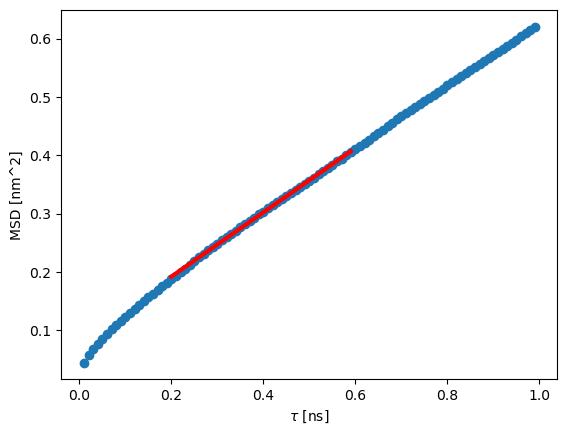

In [32]:
msds_predicted = intercept + slope * taus_selected  # y = y_int + slope * x
plt.scatter(taus[1:int(len(taus)/100)], msds[1:int(len(msds)/100)])
plt.plot(taus_selected, msds_predicted,color='r',linewidth='3')
plt.xlabel('$\\tau$ [ns]')
plt.ylabel('MSD [nm^2]')
plt.show()

7. Report R^2 of the fitting, slope and its uncertainty

In [33]:
r_2 = r_value**2
r_2

0.9993477485828295

In [34]:
slope

0.5512234052532833

In [35]:
std_err

0.0022844678362551165

In [36]:
t = stats.t.ppf(0.95, len(taus_selected))  # 95 % confidence interval t value
t

1.68385101138658

In [37]:
print(f"diffusion coefficient: {slope/6}  nm^2/ns")

diffusion coefficient: 0.09187056754221389  nm^2/ns


In [38]:
print(f"the uncertainty of the calculated diffusion coefficient: {std_err*t/6}  nm^2/ns")

the uncertainty of the calculated diffusion coefficient: 0.0006411172460930484  nm^2/ns


8. Done!